In [1]:
import numpy as np
import load_from_snapshot
import h5py
from matplotlib import pyplot as plt
import pickle

In [11]:
fileName = "sim"
TargetProperty = "MachDist"
number = {}
number[0] = 1000
number[1] = 1000
number[2] = 12800

dict = {}
MachDict = {}
tenPercentFractionDict = {}

for n in range(3): #Sets how many simulations to pickle
    ext1 ='00'+str(n);
    if (n>=10): ext1='0'+str(n)                                     #This resolves naming issues
    if (n>=100): ext1=str(n)
    datafolder = "/home/hlane/gizmo-public/Project1/" + fileName + ext1 + "/output"
    F = h5py.File(datafolder + "/snapshot_000.hdf5", "r")
    N = number[n]
    
    ids = np.array(F["PartType0"]["ParticleIDs"])
    gas_we_care_about = (ids<=N)
    ids = ids[gas_we_care_about]
    mgasInit = np.sum(np.array(F["PartType0"]["Masses"])[ids]) #MassGas in snapshot 1
    
    Mach = []
    tenPercentFraction = []
    
    dict[n] = {}
    MachDict[n] = {}
    tenPercentFractionDict[n] = {}
    
    for i in range(751): #This is for taking the FINAL Mach and Fraction#.

        tenPercentList = []
        ext='00'+str(i);
        if (i>=10): ext='0'+str(i)                                     #This resolves naming issues
        if (i>=100): ext=str(i)
        f = h5py.File(datafolder + "/snapshot_" + ext + ".hdf5", "r")  #opens file
        try:
            mStar = np.array(f["PartType5"]["Masses"])     #reads file
        except: 
            mStar = np.array([0])                #If there are no stars, the mass is zero.

        for u in mStar:
            if (10*u > mgasInit):
                tenPercentList.append(u)
        tenPercentFraction = (len(tenPercentList)/len(mStar))
        #Finding mach number
        cs = 200
        alpha_turb = 1
        alpha_B = 0.02 #What is this value used for lmao
        G = 4301
        f = h5py.File(datafolder + "/snapshot_000.hdf5", "r")
        R = f["Header"].attrs["BoxSize"]/10                   #Returns correct value

        Vrms = np.sqrt((0.6*G*mgasInit)/R)
        Mach = Vrms / cs
        
        MachDict[n][i] = Mach
        tenPercentFractionDict[n][i] = tenPercentFraction
        dict[n] = [tenPercentFractionDict, MachDict]

        F = open('pickle/' + fileName + "_" + TargetProperty + '.pickle','wb')
        pickle.dump(dict[n], F)
        
    F.close()

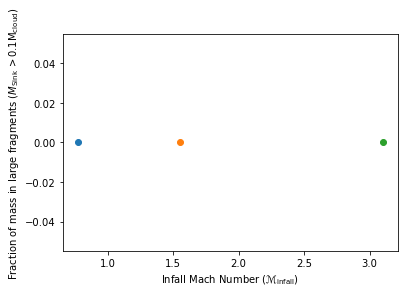

In [13]:
fileName = "sim"
F=open('pickle/' + fileName + "_" + TargetProperty + '.pickle', "rb")
temp = pickle.load(F)

tenPercentFractionDict = temp[0]
MachDict = temp[1]
for n in range (0,3):
    for i in range(194,195):
        plt.scatter(MachDict[n][i],tenPercentFractionDict[n][i])
F.close()
plt.xlabel("Infall Mach Number " + r"($ℳ_{\rm infall}\rm$)")
plt.ylabel("Fraction of mass in large fragments (" + r"$M_{\rm Sink}\, \rm > 0.1M_{\rm cloud}$)")
plt.show()